#    "Raíces en Tierras Lejanas"


En un pequeño pueblo en la provincia de Granma, dos amigos de la infancia, Juan y Mireya, crecieron entre los extensos campos de boniato y los frondosos árboles de mango. A medida que crecían, surgieron en ellos sueños de explorar nuevas oportunidades en un lugar diferente, un destino que vieron en la bulliciosa capital de Cuba, La Habana.
Impulsados por su ambición y sed de descubrimiento, Juan y Mireya decidieron emprender el viaje en busca de un futuro diferente; dejaron atrás los cultivos familiares, las risas compartidas en la sombra de los árboles de mango y los atardeceres sobre los campos de caña. Después de un largo viaje, finalmente llegaron a La Habana. Allí, se encontraron con un mundo completamente nuevo y emocionante, lleno de oportunidades y posibilidades. 

En esta breve hisotria se ve evidenciado la emigración, o desplazamiento de personas con el fin de establecerse de manera semipermanente o definitiva en otro lugar, motivado por diversas razones, ya sea como las de Juan y Mireya, en busqueda de nuevas oportunidades, o por situaciones sociales, políticos o incluso ideológicas.





 

In [132]:
#importar las bibliotecas
import plotly.express as px
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#cargamos los datos de json
with open ('datos.json','r')as gr:
    dt=gr.read()
granma=json.loads(dt)

##### función que utilizo #####

#función para sacar llenar listas con los datos del Json 
def llenar_lista(filtro1, filtro2,lista1)->list:
    lista = []
    for keys,values in granma.items(): #itero el diccionario
        if keys == filtro1: #si la clave del diccionario inicial es igual al primer filtro
            for clave,valor in values.items(): # itero el segundo diccionario2
                if clave in lista1: # si las claves están en la lista1 enviada por parametro
                     for key,value in valor.items():# itero el diccionario3 del valor de las claves que esten en la lista1
                            if key == filtro2: # si la clave de diccionario3 es igual al ultimo filtro2
                                lista.extend(value) #agrego a la lista las lista de listas
              
    return lista


#función que devuelve el total de emigrantes por cada año
def sumarEmigrantes_Años(lista,año)->int:
    suma = 0
    index = año-2006
    for i in lista:
        suma  += i[index]
    return suma



#### ¿Cuántas personas han tomado decisiones similares o iguales a la de Juan y Mireya?

Muchas personas a lo largo de los años han emigrado hacias otras provincias, antes de la división político administrativa (DPA) del 2011 existia Ciudad de la Habana, la cual era la capital y alcanzó las mayores cantidades de migrantes en los años 2008 y 2010 con 1684,1839 respectivamente. Después de la DPA se incorporan las provincias Artemisa y Mayabeque y deja de exisitr Ciudad de la Habana. La Habana, al pasar a ser la Capital del pais pasa a ser rápidamente el objetivo de la mayor cantidad de personas, por lo que no es de extrañar que fuera la provincia lider en cifras a partir de ese momento, en el 2016 con 2692 y en 2022 con un total de 3314 personas, La Habana alcanza sus picos más altos. Otras provincias donde se alcanza cifras interesantes son Matanzas, Mayabeque y Artemisa que se mantienen con un ritmo relativamente constante de emigrantes en los diferentes años.

Provincias como Guantánamo, Pinar del Rio y La Isla de la Juventud presentan un flujo de migrantes granmences muy bajo, dos de ellas ubicadas en la zona más oriental del país (Guantánamo), y la otra en la zona más occidental       (Pinar del Rio). Se concluye que la gran mayoria de los migrantes si deciden tomar decisiones similares a Juan y Mireya con destino hacia la capital o sus alrededores (Matanzas, Mayabeque y Artemisa).
##### ¿Porqué pasará esto?
 Es algo común qué el destino de los migrantes de un pais sea la capital, esta se cuenta con la mayor cantidad de recursos, muchas más oportunidades laborales tanto en la misma capital como en el exterior. Pero no todos tienen acceso a la capital o  no quieren perder el ambiente rural y deciden optar con ubicaciones a sus fornteras, así grantizan un viaje más corto hacia la capital donde pueden abastecerse de productos básicos de primera necesidad e incluso pueden garantizarse trabajo o educación, en esta ultima solo hay carreras universitarias que solo se estudian en la Habana, un claro ejemplo es la carrera Ciencia de Datos que solo está disponible en la región occidental. 

In [197]:
#llamamos a la función llenar_listas 
# con los dos primeros parametros son los filtros para llenar la lista con los datos del json
# el tercer parametro es una lista de todas las Provincias
provi = llenar_lista("ProvinciasMI","emigracion06-22",granma['Provincias'])

#separar datos de hombres que estan en los indices par
proviH = [y for x,y in enumerate(provi) if x%2 == 0 ]

#lo llevamos a matriz de numpy
proviH = np.array(proviH)

#separar datos de mujeres que están en indice impar
proviM = [y for x,y in enumerate(provi)if x%2 != 0]

#lo llevamos a matriz de numpy
proviM = np.array(proviM)

#sumamos los hombres mas las mujeres
sumaH_M = proviM + proviH

#creamos el dataFrame de Hombres y mujeres de la emigración interna desde el 2006-2022
#se le asigna a los indices las provincias y a las columnas los años del 2006-2022
df = pd.DataFrame(sumaH_M,index=granma["Provincias"],columns=[x for x in granma["años"]if x>=2006])

#le hacemos la transpuesta
df = df.T

#creamos un gráfico de lineas con plotly
fig = px.line(df,x = df.index,y = df.columns,template = 'seaborn')
#cambiamos el nombre de los ejes de coordenadas
fig.update_yaxes(title_text = 'Cantidad de emigrantes')
fig.update_xaxes(title_text = 'Años')

Las mujeres representan una parte importante de la población de un país, y en particular de una provincia. Viendo las personas qué deciden migrar a otras regiones es de gran interes tener una idea de cuantas de estas son mujeres.
 

/var/folders/6z/w7qyc8h96b92v7zs458_gfj40000gp/T/ipykernel_2045/3472718758.py:33: UserWarning:

FixedFormatter should only be used together with FixedLocator



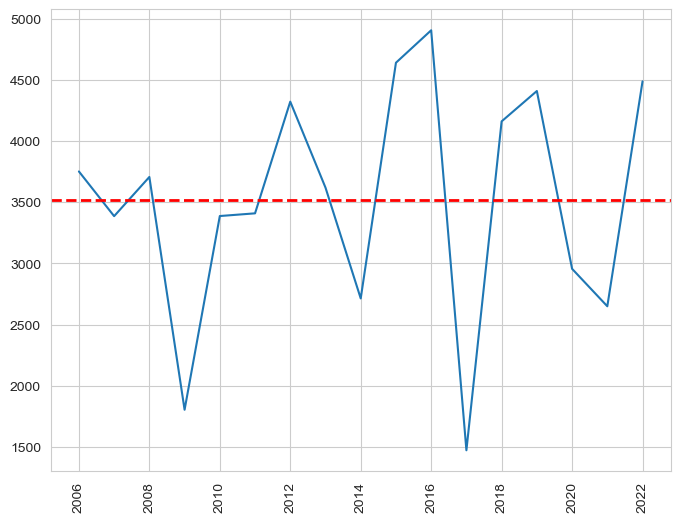

In [174]:
#creamos una lista con el total de residentes por municipios
totalH_M = llenar_lista("municipios",'residentesH_M_06-22',granma['listamunis'])

#separamos los residentes mujeres en una lista, están en las pocisiones impares.
listaM=[y for x,y in enumerate(totalH_M)if x%2 != 0]
#separamos los residentes hombres en una lista, están en las pocisiones par.
listaH=[y for x,y in enumerate(totalH_M)if x%2 == 0]
#levamos las listas a matrices de numpy
listaH=np.array(listaH)
listaM=np.array(listaM)

#las sumamos para obtener el total de residentes por año en cada municipio
sumaH_MR=listaM+listaH
#transpuesta
sumaH_MR=sumaH_M.T
#sumamos las filas 
total=sumaH_MR.sum(axis=1)

#transpuesta a la matriz de mujeres
proviMT=proviM.T
#sumar las filas de la matriz transpuesta de mujeres
totalM=proviMT.sum(axis=1)
#calculamos la media y lo llevamos a entero
media=int(np.mean(totalM))


#ajustamos el tamaño de la gráfica 
plt.figure(figsize=(8, 6))
sns.lineplot(x=[x for x in granma['años']if x>=2006],y = totalM)
# Obtener los ejes actuales
ax=plt.gca()
# Configurar el ángulo de rotación del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Agregamos la media como una línea horizontal en el gráfico
plt.axhline(y=media, color='r', linestyle='--', linewidth=2)

plt.show()



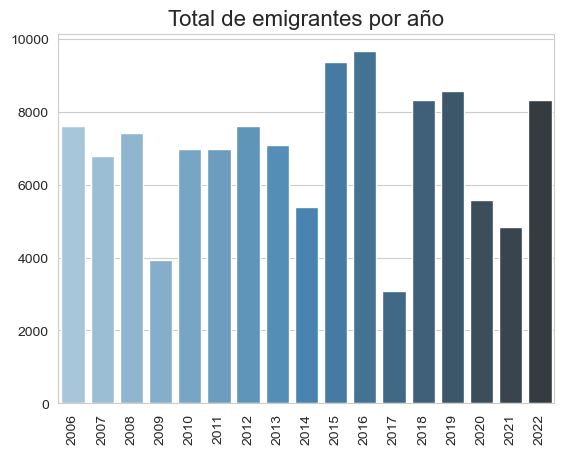

In [210]:
totalMigrantes=sumaH_M.T.sum(axis=1)
sns.barplot(x=[x for x in granma['años']if x>=2006],y=totalMigrantes, palette = "Blues_d")
# Obtener los ejes actuales
ax = plt.gca()

# Configurar el ángulo de rotación de los nombres en el eje x (por ejemplo, 45 grados)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Total de emigrantes por año', fontsize=16)
plt.show()
